# State of the art multi-objective optimization algorithms

Gabriel Henrique ALENCAR MEDEIROS

---

## Summary

### 1. [Introduction](#Introduction)

### 2. [Importing](#Importing)

### 3. [Other Results](#AutresResultats)
* #### 3.1. [The comparison between NSGA I and NSGAII](#NSGAIIVSNSGAI)
* #### 3.2. [The comparison between NSGA I and NSGA II (MOGSA only continuously)](#COMPMOGSAANDGSA)
* #### 3.3. [Comparison between different methods](#Comparaisonentredmethodes)

### 4. [Our data](#donnees)

### 5. [The methods](#Methodes)
* #### 5.1. [Non-dominated Sorting Genetic Algorithm II](#NSGA2)
* #### 5.2. [Non-dominated Sorting Genetic Algorithm III](#NSGA3)
* #### 5.3. [SPEA2](#SPEA2)
* #### 5.4. [Non-dominated Sorting Gravitational Search Algorithm](#NSGSA)
* #### 5.5. [Simple Cull algorithm](#SimpleCullAlgorithm)
* #### 5.6. [Pareto Simulated Annealing](#PSA)
* #### 5.7. [Binary Multi-Objective Tabu Search](#Tabu)
* #### 5.8. [Full Non-dominated Sorting and Ranking](#FullNSR)

### 6. [Comparison of results](#ComparaisonDesResultats)

### 7. [Conclusion](#Conclusion)

### 8. [Appendix A - Other algorithms](#AnnexeA)
* #### 8.1. [Pareto Ant Colony](#ParetoAntColony)
* #### 8.2. [Multi-Objective Particle Swarm](#MOPS)
---

<a id='Introduction'></a>
## 1. Introduction

We will see here an analysis of several methods of optimization algorithms focusing on multi-objective optimization. For each method, we will have an introduction, a methodology, an implementation, a conclusion and a bibliography.

> **The implementation will be on the same input and the codes can be found in the helpers.**

---

<a id='Importing'></a>
## 2. Importing

Here we will import the libraries needed to run the codes. We will have imported classical libraries found on the Internet and custom libraries where we will find the classes related to each method.

---

### 2.1 Importing classic libraries

In [1]:
import time
import numpy as np
import pandas as pd
import random
from deap import benchmarks
import copy

### 2.2. Importing custom libraries

In [2]:
#%pdb
import ipynb.fs.full.jupyterHelpers as juphelpers
import helpers

<a id='AutresResultats'></a>

## 3. Other Results
---

<a id='NSGAIIVSNSGAI'></a>
### 3.1 The comparison between NSGSA I and NSGA II

Image taken from [[1]](#BGNSGAII):

![La comparaison entre NSGA I et NSGA II](images/paretoNSGAIEII.png)

Le document à partir duquel l'image a été prise concluait que NSGAII était capable d'exploiter des solutions plus efficaces et non inférieures, montrant que la performance de NSGAII était supérieure à celle de NSGA en termes de maintien de la diversité entre les fronts pareto de NSGAII.

<a id='COMPMOGSAANDGSA'></a>
### 3.2 The comparison between NSGSA I and NSGA II (MOGSA only continuously)

Image taken from [[2]](#BGNSGSA):

![La comparaison entre NSGSA et NSGA II](images/NSGSAComparation.png)

In the article on which the above image was taken, several experiments using different algorithms compared to the MOGSA algorithm (multi-objective gravitational search algorithm) showed that, in continuous cases, MOGSA normally had to give excellent results compared to other algorithms.

<a id='Comparaisonentredmethodes'></a>
### 3.3 Comparison between different methods

Image taken from [[3]](#BGComp):

![The comparison between different methods](images/ComparationDifferentMethods.png)

We have shown here that NSGAII and SPEA2 have excellent results compared to several other genetic algorithms. It is from this image that these two methods have been favored and the same fact was proved effective in several other articles.

<a id='donnees'></a>

## 4. Our data

Here we will use the function **zdt1** to measure the quality of our methods. However, our real problem is a database with multiple attributes. Therefore, we will create a **list of points** that actually belong to the border of zdt1 plus Guainian variations around these points for discrete cases.

For methods using binary versions, we will sort our set of points according to the distance between the points and the center and assign and binarize the label of the integers to each row of the matrix of points. We therefore use the labels that will indicate the real points.

> We will use 3 types of metrics on the data:
1. The convergence [[4]](#metriquesconvergenceetdiversity)
2. The diversity [[4]](#metriquesconvergenceetdiversity)
3. The hypervolume [[5]](#metriqueshypervolume)

> For all methods, as we use optimization algorithms in multi-objective functions, we will find the **Pareto front** [[6]](#paretofrontexpl) rather than a single point.

> As far as codes in continuous space are concerned, it has already been proved that 400 iterations are enough to find a good Pareto front. **150 iterations were chosen if you can see which algorithm has the fastest pareto approximation.**

> **REMARK:** The points found in the input space that result in a Pareto front have been found by other optimization algorithms, so the points already have some diversity, convergence and hypervolume. Therefore, metrics are used to see if the algorithm finds the **best points provided** and compare the algorithms between them.

---

In [3]:
# Runs parameters
number_of_runs = 30

In [4]:
# Seed for all algorithms
seed_for_all = 1
random.seed(seed_for_all)

In [5]:
# Variables
# Size of the database
L_bad = 100 
# Get 100 points from the Pareto list among a set of
# (20,60,100,200,500) .
# For 100 points, we have ("convergence": 0.0008737962149921756, "diversité": 0.3680103565901581,
# "hyper volume": 120.659991) for points found.
L_good = 100
# Get total len
L = L_bad + L_good
benchData = juphelpers.bData.BenchmarkData("pareto_front")

In [6]:
def resetInputZDT1(L_bad,L_good):
    X_good = benchData.getPointsFromZDT1().dictOfPoints[L_good]
    X_bad = juphelpers.DataGenerator.createRandomDataForZDT1(L_bad,seed_for_all)
    X = X_good + X_bad
    X = juphelpers.GeneralCases.normalizedSorting(X)
    return X

In [7]:
# Paretos Front for zdt1
X = resetInputZDT1(L_bad,L_good)
optimal_front = benchData.getParetoFrontFromJSON("zdt1_front.json")

In [8]:
# Save and load
folderOfCSVs = 'statistical_results'
CsvFileNameContinu = 'en-Continu-' +str(number_of_runs)+ 'runs-'+str(L_good)+ 'good-'+str(L_bad)+'bad'
CsvFileNameDiscret = 'en-Discret-' +str(number_of_runs)+ 'runs-'+str(L_good)+ 'good-'+str(L_bad)+'bad'
saveEnabled = False

In [9]:
# Parameters for all methods
name_of_function = "zdt1"
# L_good
# L_bad
number_of_instances = 100
max_numer_of_iterations = 150
dim_of_labels = len(str(bin(len(X)-1))[2:])

In [10]:
# List of solutions
list_of_solutions_continu = []
list_of_solutions_discret = []

<a id='Methodes'></a>

## 5. The methods

---

<a id='NSGA2'></a>
### 5.1 Non-dominated Sorting Genetic Algorithm

#### 5.1.1 Introduction

The NSGA algorithm aims to improve the adaptive adaptation of a population of candidate solutions to a Pareto front constrained by a set of objective functions. The algorithm uses an evolutionary process with substitutes for evolutionary operators, including selection, genetic crossing and genetic mutation. The population is classified in a hierarchy of subpopulations based on the order of Pareto dominance. The similarity between the members of each subgroup is evaluated on the Pareto front, and the resulting groups and similarity measures are used to promote a diverse front of non-dominated solutions.[[1]](#511NSG2)

#### 5.1.2 Méthodologie

[[1]](#511NSG2)The algorithm below provides a pseudocode list of the non-dominated genetic sorting algorithm II (NSGA-II) to **minimize** a cost function.

* The function **SortByRankAndDistance** orders the population in a hierarchy of non-dominated Pareto fronts.
* **CrowdingDistanceAssignment** calculates the average distance between the members of each front on the front itself. Voir Deb et al. for a clear presentation of the pseudocode and an explanation of these functions [Deb2002].
* The **CrossoverAndMutation** function executes the classical genetic operators of crossing and mutation of the genetic algorithm.
* The **SelectParentsByRankAndDistance** and **SortByRankAndDistance** functions distinguish the members of the population according to their rank (order of precedence of the front to which the solution belongs), then the distance inside the front (calculated by **CrowdingDistanceAssignment**).

![Pseudocode](images/pseudoNSGA.png)

#### 5.1.3 Implementation

In [11]:
# Dictionaries to save statistics
dictionaireContinu = {'Methods':'NSGAII', 'Data':'ZDT1', 'Number of runs':number_of_runs}
dictionaireDiscret = {'Methods':'NSGAII', 'Data':'ZDT1', 'Number of runs':number_of_runs,
                      'Real points':L_good,
                     'Fake points':(L_bad)}

##### 5.1.3.1 Continuous case

In [12]:
# Creating a solution manager
NSGAII_solutions_continu = juphelpers.bData.single_solution(methodName="NSGAII", function_name=name_of_function,
                                                   good_points=L_good, bad_points=L_bad,
                                                   number_of_runs=number_of_runs,
                                                   numberOfPersons=number_of_instances,
                                                   iters=max_numer_of_iterations,
                                                   refpointToHyperV=[11,11],
                                                   identif="NSGAII-Continu-ZDT1",
                                                   pareto_front=optimal_front,
                                                   obj=benchmarks.zdt1,
                                                   lb=0.0, ub=1.0,
                                                   dim=30)

In [13]:
# Create envrmentment (Toolbox, Stats, Logbook) for the continuous case
envrironment = juphelpers.nsga2.create_Environment_For_NSGAII_Continuous_Case(0.0,
                                                            1.0, 30,
                                                            juphelpers.DataGenerator.uniform,
                                                            benchmarks.zdt1,
                                                            weights=(-1.0,-1.0),
                                                            eta = 20.0, indpb=1/30)

In [14]:
for run in range(number_of_runs):
    envrironment_copy = copy.deepcopy(envrironment)
    # --------------------------------------------------------------------------------------------------

    # Get a better population and statistics
    start_time = time.time()
    # ==================================================================================================
    (pop_tot, stats) = juphelpers.nsga2.NSGAII_Continuous_Case(envrironment_copy, NGEN=max_numer_of_iterations,
                                                             MU=number_of_instances,
                                                              showprogress=False,
                                                                seed = run)
    # ==================================================================================================
    delta_time = time.time() - start_time
    
    pop_tot.sort(key=lambda x: x.fitness.values)
    pop = []
    # Getting pop as a list
    for p in pop_tot[::2]:
        pop.append(list(p))
    
    # Add solution
    NSGAII_solutions_continu.add_one_run(pop,delta_time)

In [15]:
# Average values
(t,c,d,h) = NSGAII_solutions_continu.returnMeanValues()

dictionaireContinu.update({'Average time of execution (s)':str(t)})
dictionaireContinu.update({'Average convergence':str(c), 'Average diversity':str(d),
                          'Average hypervolume':str(h)})

In [16]:
print("Time of execution (s): ",t)
print("Convergence: ",c)
print("Diversity: ",d)
print("hypervolume: ",h)

Time of execution (s):  5.207257318496704
Convergence:  0.005454278669398833
Diversity:  0.2598724213942038
hypervolume:  120.53790441268828


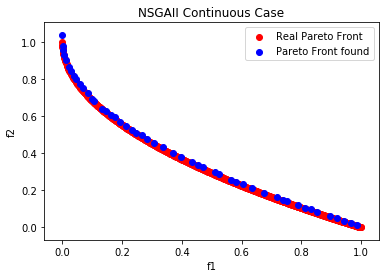

In [17]:
# Plot
juphelpers.plotFrontgraphics(np.array([benchmarks.zdt1(ind) for ind in NSGAII_solutions_continu.bestPop]),
                  np.array(optimal_front),
                  title = "NSGAII Continuous Case",xlabel="f1",ylabel="f2")

In [18]:
# Add a solution to the list of solutions
list_of_solutions_continu.append(NSGAII_solutions_continu)

In [19]:
# Saving information
if saveEnabled:
    juphelpers.GeneralCases.save_dict(dictionaireContinu, folderOfCSVs, CsvFileNameContinu)

##### 5.1.3.2 Discrete case

In [20]:
# Creating a solution handler
NSGAII_solutions_discret = juphelpers.bData.single_solution(methodName="NSGAII", function_name=name_of_function,
                                                   good_points=L_good, bad_points=L_bad,
                                                   number_of_runs=number_of_runs,
                                                   numberOfPersons=number_of_instances,
                                                   iters=max_numer_of_iterations,
                                                   refpointToHyperV=[11,11],
                                                   identif="NSGAII-Discret-ZDT1",
                                                   pareto_front=optimal_front,
                                                   obj=benchmarks.zdt1,
                                                   lb=0, ub=1,
                                                   dim=dim_of_labels)

In [21]:
# Create envrironment (Toolbox, Stats, Logbook) for the discrete case
envrironment = juphelpers.nsga2.create_Environment_For_NSGAII_Discrete_Case(X,
                                                           dim_of_labels,
                                                           (-1.0, -1.0),
                                                           benchmarks.zdt1,
                                                           random_labels=True,
                                                           seed = seed_for_all)

/home/galencarmedeiro/.local/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessCustom' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/home/galencarmedeiro/.local/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [22]:
for run in range(number_of_runs):
    envrironment_copy = copy.deepcopy(envrironment)
    # --------------------------------------------------------------------------------------------------

    # Get a better population and statistics
    start_time = time.time()
    # ==================================================================================================
    (pop_tot, logbook) = juphelpers.nsga2.NSGAII_Discrete_Case(envrironment_copy,
                                                       NGEN=max_numer_of_iterations, MU=number_of_instances,
                                                       CXPB=0.93, showprogress = False,
                                                       seed = run)
    # ==================================================================================================
    delta_time = time.time() - start_time
    
    # Getting good population by labels
    pop_tot.sort(key=lambda x: x.fitness.values)
    label_pop = pop_tot[::2]
    pop = [X[juphelpers.nsga2.binToInt(p)] for p in label_pop]
    
    # Add solution
    NSGAII_solutions_discret.add_one_run(pop,delta_time)

In [23]:
# Convergence and diversity
(t,c,d,h) = NSGAII_solutions_discret.returnMeanValues()

dictionaireDiscret.update({'Average time of execution (s)':str(t)})
dictionaireDiscret.update({'Average convergence':str(c), 'Average diversity':str(d),
                          'Average hypervolume':str(h)})

In [24]:
print("Time of execution (s): ",t)
print("Convergence: ",c)
print("Diversity: ",d)
print("hypervolume: ",h)

Time of execution (s):  1.9095039049784341
Convergence:  0.0007424333370297968
Diversity:  0.31456712280860905
hypervolume:  120.65446086258045


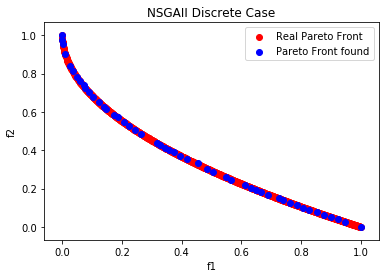

In [25]:
juphelpers.plotFrontgraphics(np.array([benchmarks.zdt1(ind) for ind in NSGAII_solutions_discret.bestPop]),
                  np.array(optimal_front),
                  title = "NSGAII Discrete Case",xlabel="f1",ylabel="f2")

In [26]:
# Add a solution to the list of solutions
list_of_solutions_discret.append(NSGAII_solutions_discret)

In [27]:
# Saving information
if saveEnabled:
    juphelpers.GeneralCases.save_dict(dictionaireDiscret, folderOfCSVs, CsvFileNameDiscret)

#### 5.1.4 Conclusion

> We can observe an excellent performance for the continuous case.

> Our algorithm in the binary case always finds a great convergence, but the divergence can sometimes be bad. This is because some elements of the population are identical, which increases the value of the measure. However, our elements do not perfectly detect all of the original Pareto curve, but all the points describe the curve well.

#### 5.1.5 Bibliography
<a id='511NSG2'></a>
1. http://www.cleveralgorithms.com/nature-inspired/evolution/nsga.html

<a id='NSGA3'></a>
### 5.2 Non-dominated Sorting Genetic Algorithm III

#### 5.3.1 Introduction



[[1]](#NSGA3INTRO) NSGA-III is an optimization Pareto method that works well with problems with **multiple objectives** (three or more). The main difference between this algorithm and NSGA-II is that NSGA-III uses a **set of reference points to maintain the diversity of Pareto points during the search.** This results in a very uniform distribution of Pareto points in the goal space, even when the number of goals is large.

**NSGA-II on DTLZ2**
Image taken from [[2]](#NSGA2DTLZ2IMAGE):
![NSGA2 DTLZ2 IMAGE](images/DTLZ2-solved-by-NSGA-II.png)

**NSGA-III on DTLZ2**
Image taken from [[3]](#NSGA3DTLZ2IMAGE):
![NSGA3 DTLZ2 IMAGE](images/DTLZ2-solved-by-NSGA-III.png)

#### 5.2.2 Methodology

**Pseudocode NSGA-III**
Image taken from [[4]](#NSGA3DTLZ2IMAGE):
![NSGA3 DTLZ2 IMAGE](images/NSGAIII-PSEUDO.png)

#### 5.2.3 Implementation

In [28]:
# Dictionaries to save statistics
dictionaireContinuNSGA3 = {'Methods':'NSGAIII', 'Data':'ZDT1', 'Number of runs':number_of_runs}
dictionaireDiscretNSGA3 = {'Methods':'NSGAIII', 'Data':'ZDT1', 'Number of runs':number_of_runs,
                      'Real points':L_good,
                     'Fake points':(L_bad)}

##### 5.2.3.1 Continuous case

In [29]:
# Creating a solution handler
NSGAIII_solutions_continu = juphelpers.bData.single_solution(methodName="NSGAII", function_name=name_of_function,
                                                   good_points=L_good, bad_points=L_bad,
                                                   number_of_runs=number_of_runs,
                                                   numberOfPersons=number_of_instances,
                                                   iters=max_numer_of_iterations,
                                                   refpointToHyperV=[11,11],
                                                   identif="NSGAII-Continu-ZDT1",
                                                   pareto_front=optimal_front,
                                                   obj=benchmarks.zdt1,
                                                   lb=0.0, ub=1.0,
                                                   dim=30)

In [30]:
# Create envrmentment (Toolbox, Stats, Logbook, ref_points) for the continuous case
envrironment = juphelpers.nsga3.create_Environment_For_NSGAIII_Continuous_Case(0.0, 1.0, 30,
                                                 juphelpers.DataGenerator.uniform,benchmarks.zdt1,
                                                 (-1.0,-1.0),indpb=1/30,
                                                 P = number_of_instances//2)

In [31]:
for run in range(number_of_runs):
    envrironment_copy = copy.deepcopy(envrironment)
    # --------------------------------------------------------------------------------------------------

    # Get a better population and statistics
    start_time = time.time()
    # ==================================================================================================
    (pop_tot, stats) = juphelpers.nsga3.NSGAIII_Continuous_Case(envrironment_copy, NGEN=max_numer_of_iterations,
                                                               MU=number_of_instances, CXPB=0.93,
                                                               MUTPB=1.0,
                                                               seed=run,showprogress = False)
    # ==================================================================================================
    delta_time = time.time() - start_time
    
    pop_tot.sort(key=lambda x: x.fitness.values)
    pop = []
    # Getting pop as a list
    for p in pop_tot:
        pop.append(list(p))
    
    # Add solution
    NSGAIII_solutions_continu.add_one_run(pop,delta_time)

In [32]:
# Convergence and diversity
(t,c,d,h) = NSGAIII_solutions_continu.returnMeanValues()

dictionaireContinuNSGA3.update({'Average time of execution (s)':str(t)})
dictionaireContinuNSGA3.update({'Average convergence':str(c), 'Average diversity':str(d),
                          'Average hypervolume':str(h)})

In [33]:
print("Time of execution (s): ",t)
print("Convergence: ",c)
print("Diversity: ",d)
print("hypervolume: ",h)

Time of execution (s):  2.332334550221761
Convergence:  0.005973650585918111
Diversity:  0.8102074999208172
hypervolume:  120.51097712067266


In [34]:
# Add a solution to the list of solutions
list_of_solutions_continu.append(NSGAIII_solutions_continu)

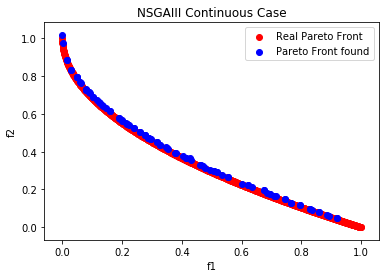

In [35]:
juphelpers.plotFrontgraphics(np.array([benchmarks.zdt1(ind) for ind in NSGAIII_solutions_continu.bestPop]),
                  np.array(optimal_front),
                  title = "NSGAIII Continuous Case",xlabel="f1",ylabel="f2")

In [36]:
# Saving information
if saveEnabled:
    juphelpers.GeneralCases.save_dict(dictionaireContinuNSGA3, folderOfCSVs, CsvFileNameContinu)

##### 5.2.3.2 Discrete case

In [37]:
# Creating a solution handler
NSGAIII_solutions_discret = juphelpers.bData.single_solution(methodName="NSGAIII", function_name=name_of_function,
                                                   good_points=L_good, bad_points=L_bad,
                                                   number_of_runs=number_of_runs,
                                                   numberOfPersons=number_of_instances,
                                                   iters=max_numer_of_iterations,
                                                   refpointToHyperV=[11,11],
                                                   identif="NSGAIII-Discret-ZDT1",
                                                   pareto_front=optimal_front,
                                                   obj=benchmarks.zdt1,
                                                   lb=0, ub=1,
                                                   dim=dim_of_labels)

In [38]:
# Create envrironment (Toolbox, Stats, Logbook) for the discrete case
envrironment = juphelpers.nsga3.create_Environment_For_NSGAIII_Discrete_Case(X,
                                                       dim_of_labels,
                                                       (-1.0, -1.0),
                                                       benchmarks.zdt1,
                                                       random_labels=True,
                                                       seed = seed_for_all,
                                                       P=number_of_instances)

In [39]:
for run in range(number_of_runs):
    envrironment_copy = copy.deepcopy(envrironment)
    # --------------------------------------------------------------------------------------------------

    # Get a better population and statistics
    start_time = time.time()
    # ==================================================================================================
    (pop_tot, stats) = juphelpers.nsga3.NSGAIII_Discrete_Case(envrironment_copy, NGEN=max_numer_of_iterations,
                                                               MU=number_of_instances, CXPB=0.93,
                                                               MUTPB=1.0,
                                                               seed=run,showprogress = False)
    # ==================================================================================================
    delta_time = time.time() - start_time
    
    # Getting good population by labels
    pop_tot.sort(key=lambda x: x.fitness.values)
    label_pop = pop_tot[::2]
    pop = [X[juphelpers.nsga3.binToInt(p)] for p in label_pop]
    
    # Add solution
    NSGAIII_solutions_discret.add_one_run(pop,delta_time)

In [40]:
# Convergence and diversity
(t,c,d,h) = NSGAIII_solutions_discret.returnMeanValues()

dictionaireDiscretNSGA3.update({'Average time of execution (s)':str(t)})
dictionaireDiscretNSGA3.update({'Average convergence':str(c), 'Average diversity':str(d),
                          'Average hypervolume':str(h)})

In [41]:
print("Time of execution (s): ",t)
print("Convergence: ",c)
print("Diversity: ",d)
print("hypervolume: ",h)

Time of execution (s):  2.2551168759663898
Convergence:  0.0009094598591988759
Diversity:  0.41794287409139896
hypervolume:  120.60037487811236


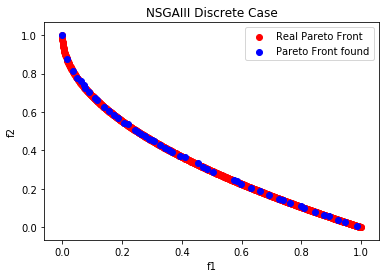

In [42]:
juphelpers.plotFrontgraphics(np.array([benchmarks.zdt1(ind) for ind in NSGAIII_solutions_discret.bestPop]),
                  np.array(optimal_front),
                  title = "NSGAIII Discrete Case",xlabel="f1",ylabel="f2")

In [43]:
# Add a solution to the list of solutions
list_of_solutions_discret.append(NSGAIII_solutions_discret)

In [44]:
# Saving information
if saveEnabled:
    juphelpers.GeneralCases.save_dict(dictionaireDiscretNSGA3, folderOfCSVs, CsvFileNameDiscret)

#### 5.2.4 Conclusion


Note that the algorithm gives good results, but NASGAII seems to represent the best pareto front of zdt1. However, we can see, according to the introductory images, that the NSGAIII has better performance on more complex Pareto fronts on larger output spaces.

#### 5.2.5 Bibliography

<a id='NSGA3INTRO'></a>
1. http://www.redcedartech.com/docs/HEEDSMDO/Study_Tab/Parameter_Optimization_Projects/NAGAIII.htm
<a id='NSGA2DTLZ2IMAGE'></a>
2. https://www.researchgate.net/figure/DTLZ2-solved-by-NSGA-II_fig1_258386891
<a id='NSGA3DTLZ2IMAGE'></a>
3. https://www.cogentoa.com/article/10.1080/23311916.2016.1269383.pdf 
<a id='NSGA3PSEUDO'></a>
4. https://www.researchgate.net/figure/Pseudocode-of-NSGA-III-main-procedure_fig12_265552713

<a id='SPEA2'></a>
### 5.3 SPEA2: Improving the Strength Pareto Evolutionary Algorithm

#### 5.3.1 Introduction

[[1]](#531SPEA2Paper)SPEA2 is another multi-objective genetic algorithm, but it has tried to eliminate the potential weaknesses of its predecessor (SPEA) and integrate the latest results to design a powerful evolutionary multiobjective optimization (EMO) algorithm updated. The main differences between SPEA2 and SPEA are as follows:

1. An improved fitness assignment scheme is used, which takes into account the number of individuals it dominates and over which it dominates.
2. A near neighbor density estimation technique is incorporated which allows more precise guidance of the search process.
3. A new method of archival truncation guarantees the preservation of boundary solutions.


#### 5.3.2 Methodology
![PseudocodeSPEA2](images/spea2pseudocode.png)

#### 5.3.3 Implementation

In [45]:
# Dictionaries to save statistics
dictionaireContinuSPEA2 = {'Methods':'SPEA2', 'Data':'ZDT1', 'Number of runs':number_of_runs}
dictionaireDiscretSPEA2 = {'Methods':'SPEA2', 'Data':'ZDT1', 'Number of runs':number_of_runs,
                      'Real points':L_good,
                     'Fake points':(L_bad)}

##### 5.3.3.1 Continuous case

In [46]:
# Creating a solution handler
SPEA2_solutions_continu = juphelpers.bData.single_solution(methodName="SPEA2", function_name=name_of_function,
                                                   good_points=L_good, bad_points=L_bad,
                                                   number_of_runs=number_of_runs,
                                                   numberOfPersons=number_of_instances,
                                                   iters=max_numer_of_iterations,
                                                   refpointToHyperV=[11,11],
                                                   identif="SPEA2-Continu-ZDT1",
                                                   pareto_front=optimal_front,
                                                   obj=benchmarks.zdt1,
                                                   lb=0.0, ub=1.0,
                                                   dim=30)

In [47]:
# Create environment (Toolbox, Stats, Logbook) for the continuous case
envrironment = juphelpers.spea2.create_Environment_For_SPEA2_Continuous_Case(0.0,
                                                            1.0, 30,
                                                            juphelpers.DataGenerator.uniform,
                                                            benchmarks.zdt1,
                                                            weights=(-1.0,-1.0),
                                                            eta = 20.0, indpb=1/30)

In [48]:
for run in range(number_of_runs):
    envrironment_copy = copy.deepcopy(envrironment)
    # --------------------------------------------------------------------------------------------------

    # Get a better population and statistics
    start_time = time.time()
    # ==================================================================================================
    (pop_tot, stats) = juphelpers.spea2.SPEA2_Continuous_Case(envrironment_copy, NGEN=max_numer_of_iterations,
                                                             MU=number_of_instances,CXPB=0.93,
                                                             seed=run,
                                                             showprogress=False)
    # ==================================================================================================
    delta_time = time.time() - start_time
    
    pop_tot.sort(key=lambda x: x.fitness.values)
    pop = []
    # Getting pop as a list
    for p in pop_tot:
        pop.append(list(p))
    
    # Add solution
    SPEA2_solutions_continu.add_one_run(pop,delta_time)

In [49]:
# Convergence and diversity
(t,c,d,h) = SPEA2_solutions_continu.returnMeanValues()

dictionaireContinuSPEA2.update({'Average time of execution (s)':str(t)})
dictionaireContinuSPEA2.update({'Average convergence':str(c), 'Average diversity':str(d),
                          'Average hypervolume':str(h)})

In [50]:
print("Time of execution (s): ",t)
print("Convergence: ",c)
print("Diversity: ",d)
print("hypervolume: ",h)

Time of execution (s):  9.041295035680134
Convergence:  0.07895680796611654
Diversity:  0.9993994078909225
hypervolume:  113.6259588216765


In [51]:
# Add a solution to the list of solutions
list_of_solutions_continu.append(SPEA2_solutions_continu)

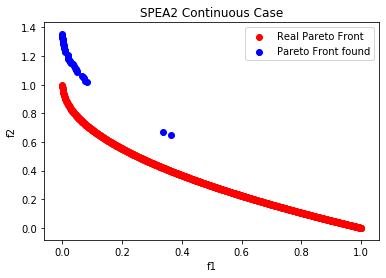

In [52]:
juphelpers.plotFrontgraphics(np.array([benchmarks.zdt1(ind) for ind in SPEA2_solutions_continu.bestPop]),
                  np.array(optimal_front),
                  title = "SPEA2 Continuous Case",xlabel="f1",ylabel="f2")

In [53]:
# Saving information
if saveEnabled:
    juphelpers.GeneralCases.save_dict(dictionaireContinuSPEA2, folderOfCSVs, CsvFileNameContinu)

##### 5.3.3.2 Discrete case

In [54]:
# Creating a solution handler
SPEA2_solutions_discret = juphelpers.bData.single_solution(methodName="SPEA2", function_name=name_of_function,
                                                   good_points=L_good, bad_points=L_bad,
                                                   number_of_runs=number_of_runs,
                                                   numberOfPersons=number_of_instances,
                                                   iters=max_numer_of_iterations,
                                                   refpointToHyperV=[11,11],
                                                   identif="SPEA2-Discret-ZDT1",
                                                   pareto_front=optimal_front,
                                                   obj=benchmarks.zdt1,
                                                   lb=0, ub=1,
                                                   dim=dim_of_labels)

In [55]:
# Create envrironment (Toolbox, Stats, Logbook) for the discrete case
envrironment = juphelpers.spea2.create_Environment_For_SPEA2_Discrete_Case(X,
                                                           dim_of_labels,
                                                           (-1.0, -1.0),
                                                           benchmarks.zdt1,
                                                           random_labels=True,
                                                           seed=seed_for_all)

In [56]:
for run in range(number_of_runs):
    envrironment_copy = copy.deepcopy(envrironment)
    # --------------------------------------------------------------------------------------------------

    # Get a better population and statistics
    start_time = time.time()
    # ==================================================================================================
    (pop_tot, logbook) = juphelpers.spea2.SPEA2_Discrete_Case(envrironment_copy,
                                               NGEN=max_numer_of_iterations, MU=number_of_instances,
                                               CXPB=0.93, seed=run,
                                               showprogress = False)
    # ==================================================================================================
    delta_time = time.time() - start_time
    
    # Getting good population by labels
    pop = [X[juphelpers.nsga2.binToInt(p)] for p in pop_tot]
    
    # Add solution
    SPEA2_solutions_discret.add_one_run(pop,delta_time)

In [57]:
# Convergence and diversity
(t,c,d,h) = SPEA2_solutions_discret.returnMeanValues()

dictionaireDiscretSPEA2.update({'Average time of execution (s)':str(t)})
dictionaireDiscretSPEA2.update({'Average convergence':str(c), 'Average diversity':str(d),
                          'Average hypervolume':str(h)})

In [58]:
print("Time of execution (s): ",t)
print("Convergence: ",c)
print("Diversity: ",d)
print("hypervolume: ",h)

Time of execution (s):  83.87562856674194
Convergence:  0.001251840305013012
Diversity:  0.15231476772757768
hypervolume:  120.652560131747


In [59]:
# Add a solution to the list of solutions
list_of_solutions_discret.append(SPEA2_solutions_discret)

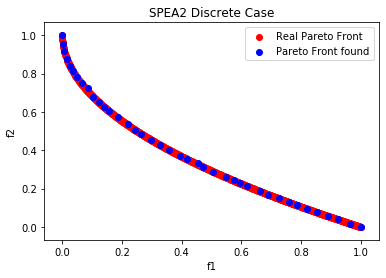

In [60]:
juphelpers.plotFrontgraphics(np.array([benchmarks.zdt1(ind) for ind in SPEA2_solutions_discret.bestPop]),
                  np.array(optimal_front),
                  title = "SPEA2 Discrete Case",xlabel="f1",ylabel="f2")

In [61]:
# Saving information
if saveEnabled:
    juphelpers.GeneralCases.save_dict(dictionaireDiscretSPEA2, folderOfCSVs, CsvFileNameDiscret)

#### 5.3.4 Conclusion

> The SPEA2 in the continuous case did not have a good performance compared to the NSGAII. This is observed by the number of iterations, the population and how the points were instantiated. This fact can be easily confirmed by increasing the number of iterations (SPEA2 takes longer to converge than NSGAII, but has a better divergence).
> SPEA2 gave excellent results for the discrete case. However, although it has the best diversity, several points of the Pareto curve have not been found. In a problem where we want all the points of the Pareto curve, NSGAII is more adequate.

#### 5.3.5 Bibliography

<a id='531SPEA2Paper'></a>
1. https://pdfs.semanticscholar.org/6672/8d01f9ebd0446ab346a855a44d2b138fd82d.pdf

<a id='NSGSA'></a>
### 5.4 Non-dominated Sorting Gravitational Search

#### 5.4.1 Introduction

**Non-Dominated Sorting Gravitational Search (NSGSA)** uses the concept of _tri non-dominated_ to update particle gravitational acceleration. **External archives** are also used to store Pareto's optimal solutions and provide a bit of 'elitism'. It also directs research to uncluttered areas and extreme areas of the **Pareto Front**. Finally, a new criterion is proposed to update the external archives. [[1]](#MOGSAWITHPSEUDO)

#### 5.4.2 Methodology

Image taken from [[1]](#MOGSAWITHPSEUDO):
![PseudocodeNSGSA](images/PseudoNSGSA.png)

#### 5.4.3 Implementation

In [62]:
# Dictionaries to save statistics
dictionaireMOGSAContinu = {'Methods':'MOGSA', 'Data':'ZDT1', 'Number of runs':number_of_runs}
dictionaireMOGSADiscret = {'Methods':'MOGSA', 'Data':'ZDT1', 'Number of runs':number_of_runs,
                      'Real points':L_good,
                     'Fake points':(L_bad)}

##### 5.4.3.1 Continuous case

In [63]:
# Creating a solution handler
MOGSA_solutions_continu = juphelpers.bData.single_solution(methodName="MOGSA", function_name=name_of_function,
                                                   good_points=L_good, bad_points=L_bad,
                                                   number_of_runs=number_of_runs,
                                                   numberOfPersons=number_of_instances,
                                                   iters=max_numer_of_iterations,
                                                   refpointToHyperV=[11,11],
                                                   identif="MOGSA-Continu-ZDT1",
                                                   pareto_front=optimal_front,
                                                   obj=benchmarks.zdt1,
                                                   lb=0.0, ub=1.0,
                                                   dim=30)

In [64]:
for run in range(number_of_runs):

    # Get a better population and statistics
    # ==================================================================================================
    sol = juphelpers.mogsa.Continuous_MOGSA(benchmarks.zdt1,lb=0.,ub=1.,dim=30,
                                        PopSize=number_of_instances,iters=max_numer_of_iterations,
                                        weights=(-1,-1),
                                        n_archive=number_of_instances, ps_m=0.002, pr_m=0.001,
                                        showprogress=False,
                                        randomseed = run)
    # ==================================================================================================
    
    # Getting good population
    pop = [ind.pos for ind in sol.archive]
    
    # Add solution
    MOGSA_solutions_continu.add_one_run(pop,sol.executionTime)

In [65]:
# Convergence and diversity
(t,c,d,h) = MOGSA_solutions_continu.returnMeanValues()

dictionaireMOGSAContinu.update({'Average time of execution (s)':str(t)})
dictionaireMOGSAContinu.update({'Average convergence':str(c), 'Average diversity':str(d),
                          'Average hypervolume':str(h)})

In [66]:
print("Time of execution (s): ",t)
print("Convergence: ",c)
print("Diversity: ",d)
print("hypervolume: ",h)

Time of execution (s):  136.3214770078659
Convergence:  0.0007478575781703402
Diversity:  0.41009295289125186
hypervolume:  120.62110910661514


In [67]:
# Add a solution to the list of solutions
list_of_solutions_continu.append(MOGSA_solutions_continu)

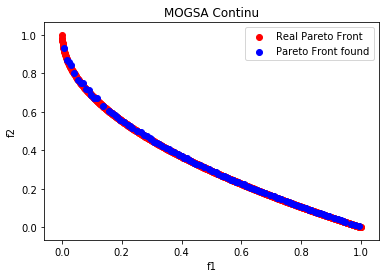

In [68]:
# Plot
juphelpers.plotFrontgraphics(np.array([benchmarks.zdt1(ind) for ind in MOGSA_solutions_continu.bestPop]),
                             np.array(optimal_front),
                             title = "MOGSA Continu",
                             xlabel="f1",ylabel="f2")

In [69]:
# Saving information
if saveEnabled:
    juphelpers.GeneralCases.save_dict(dictionaireMOGSAContinu, folderOfCSVs, CsvFileNameContinu)

##### 5.4.3.2 Discrete case

In [70]:
# Creating a solution handler
MOGSA_solutions_discret = juphelpers.bData.single_solution(methodName="MOGSA",
                                                   function_name=name_of_function,
                                                   good_points=L_good, bad_points=L_bad,
                                                   number_of_runs=number_of_runs,
                                                   numberOfPersons=number_of_instances,
                                                   iters=max_numer_of_iterations,
                                                   refpointToHyperV=[11,11],
                                                   identif="MOGSA-Discret-ZDT1",
                                                   pareto_front=optimal_front,
                                                   obj=benchmarks.zdt1,
                                                   lb=0, ub=1,
                                                   dim=dim_of_labels)

In [71]:
# Put the feasibility function in the correct format
(feasibility, multiObj) = juphelpers.mogsa.createEnvironment(benchmarks.zdt1, X)

In [72]:
for run in range(number_of_runs):
    
    # Get a better population and statistics
    start_time = time.time()
    # ==================================================================================================
    sol = juphelpers.mogsa.Binary_MOGSA(multiObj,feasibility,dim_of_labels,PopSize=number_of_instances,
                  iters=max_numer_of_iterations,
                  weights=(-1,-1),n_archive=number_of_instances,ps_m=0.1, pr_m=0.5/(2*number_of_instances),
                  flipProb=0.1/(2*number_of_instances),
                  showprogress=False,
                randomseed = run)
    # ==================================================================================================
    delta_time = time.time() - start_time
    
    # Getting good population by labels
    pop = [X[juphelpers.nsga2.binToInt(p.pos)] for p in sol.archive]
    
    # Add solution
    MOGSA_solutions_discret.add_one_run(pop,sol.executionTime)

In [73]:
# Convergence et diversité
(t,c,d,h) = MOGSA_solutions_discret.returnMeanValues()

dictionaireMOGSADiscret.update({'Average time of execution (s)':str(t)})
dictionaireMOGSADiscret.update({'Average convergence':str(c), 'Average diversity':str(d),
                          'Average hypervolume':str(h)})

In [74]:
print("Time of execution (s): ",t)
print("Convergence: ",c)
print("Diversity: ",d)
print("hypervolume: ",h)

Time of execution (s):  302.22506488164265
Convergence:  0.0010412830929134725
Diversity:  0.33146670518179094
hypervolume:  120.6592828441508


In [75]:
# Add a solution to the list of solutions
list_of_solutions_discret.append(MOGSA_solutions_discret)

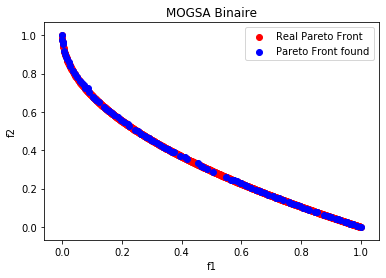

In [76]:
# Plot
juphelpers.plotFrontgraphics(np.array([benchmarks.zdt1(ind) for ind in MOGSA_solutions_discret.bestPop]),
                             np.array(optimal_front),
                             title = "MOGSA Binaire",
                             xlabel="f1",ylabel="f2")

In [77]:
# Saving information
if saveEnabled:
    juphelpers.GeneralCases.save_dict(dictionaireMOGSADiscret, folderOfCSVs, CsvFileNameDiscret)

##### 5.4.4 Conclusion

When carrying out the construction of the algorithm, we can see that it is a method where the choice of the parameters can greatly influence the convergence, and if there is no attention, the algorithm can fall down to an optimal place and stay there a long time, because the only way out of this place would be by mutations.

In any case, it is an interesting method (with respect to the methodology), which for the continuous case, with a good regulation of the parameters, it is possible to obtain good results, but the discrete case has not yet has been explored, the experiments performed here being a mixture of binary GSA and the original MOGSA plus the addition of a mutation operator. So it's always an area to explore, but you can already get very good results.

#### 5.4.5 Bibliography

<a id='MOGSAWITHPSEUDO'></a>
1. https://www.researchgate.net/publication/303184329_A_Multi_objective_gravitational_search_algorithm_based_on_non-dominated_sorting
<a id='MOGSASurvey'></a>
2. https://www.sciencedirect.com/science/article/pii/S2210650217303577
<a id='MOGSADisruption'></a>
3. https://core.ac.uk/download/pdf/82093137.pdf
<a id='OnlyGSA'></a>
4. https://www.sciencedirect.com/science/article/pii/S0020025509001200
<a id='GSACode'></a>
5. https://github.com/himanshuRepo/Gravitational-Search-Algorithm

<a id='SimpleCullAlgorithm'></a>
### 5.5 Simple Cull Algorithm

#### 5.5.1 Introduction

Simple Cull (SC) is a simple algorithm for finding the front pareto as a block nested loop algorithm. [[1]](#521SIMPLECULL)

#### 5.5.2 Methodology

It examines the configurations one by one and maintains a set $ C_ {min} $ of Pareto points among the points observed so far. Whenever a new point is inspected, two situations can occur:
1. If the point is dominated by one or more of the existing Pareto points in $ C_ {min} $, it is ignored.
2. If the point is not dominated in $ C_ {min} $, all $ C_ {min} $ points dominated by the new point are removed and the new point is added to $ C_ {min} $.

#### 5.5.3 Implementation

In [78]:
# Dictionaries to save statistics
dictionaireDiscretSC = {'Methods':'Simple Cull', 'Data':'ZDT1', 'Number of runs':number_of_runs,
                      'Real points':L_good,
                     'Fake points':(L_bad)}

In [79]:
# Creating a solution handler
Simple_Cull_solutions_discret = juphelpers.bData.single_solution(methodName="Simple Cull",
                                                   function_name=name_of_function,
                                                   good_points=L_good, bad_points=L_bad,
                                                   number_of_runs=number_of_runs,
                                                   numberOfPersons=number_of_instances,
                                                   iters=max_numer_of_iterations,
                                                   refpointToHyperV=[11,11],
                                                   identif="Simple-Cull-Discret-ZDT1",
                                                   pareto_front=optimal_front,
                                                   obj=benchmarks.zdt1,
                                                   lb=0, ub=1,
                                                   dim=dim_of_labels)

In [80]:
for run in range(number_of_runs):
    # Get a better population and statistics
    start_time = time.time()
    # ==================================================================================================
    paretoPoints, dominatedPoints = juphelpers.sCull.simple_cull(X, benchmarks.zdt1, (1.0,1.0))
    # ==================================================================================================
    delta_time = time.time() - start_time
    
    # Add solution
    Simple_Cull_solutions_discret.add_one_run(paretoPoints,delta_time)

In [81]:
# Convergence and diversity
(t,c,d,h) = Simple_Cull_solutions_discret.returnMeanValues()

dictionaireDiscretSC.update({'Average time of execution (s)':str(t)})
dictionaireDiscretSC.update({'Average convergence':str(c), 'Average diversity':str(d),
                          'Average hypervolume':str(h)})

In [82]:
print("Time of execution (s): ",t)
print("Convergence: ",c)
print("Diversity: ",d)
print("hypervolume: ",h)

Time of execution (s):  0.03978236516316732
Convergence:  0.0010412830929134725
Diversity:  0.33146670518179094
hypervolume:  120.6592828441508


In [83]:
# Add a solution to the list of solutions
list_of_solutions_discret.append(Simple_Cull_solutions_discret)

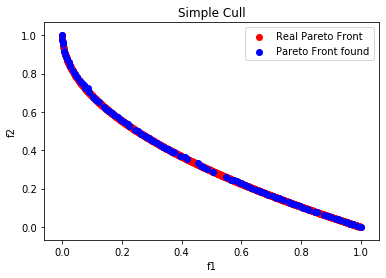

In [84]:
juphelpers.plotFrontgraphics(np.array([benchmarks.zdt1(ind) for ind in Simple_Cull_solutions_discret.bestPop]),
                             np.array(optimal_front),
                             title = "Simple Cull",
                             xlabel="f1",ylabel="f2")

In [85]:
# Saving information
if saveEnabled:
    juphelpers.GeneralCases.save_dict(dictionaireDiscretSC, folderOfCSVs, CsvFileNameDiscret)

#### 5.5.4 Conclusion

> It is easy to understand, easy to implement and has excellent results, but due to the complexity of $ O (N ^ 2 * o) $ (where **o** is the size of the output), the algorithm will soon start to increase the execution time because it has more points, and for genetic algorithms, the easena tool facilitates stopping by making the genetic algorithm probably faster than simple slaughter for many points.

#### 5.5.5 Bibliography

<a id='521SIMPLECULL'></a>
1. http://www.es.ele.tue.nl/pareto/papers/date2007_paretocalculator_final.pdf

<a id='PSA'></a>
### 5.6 Pareto Simulated Annealing

#### 5.6.1 Introduction

[[3]](#PSAWiki)It is a multi-optimization meta-heuristic that consists of a stochastic local search technique based on the principles of thermodynamics (annealing or annealing) which consists of a mixture of heating (exploring) and cooling (exploiting).

#### 5.6.2 Methodology
Image taken from [[1]](#ParetoAntColonyToAnnealing):
![PseudocodePSA1](images/PSA1.png)
![PseudocodePSA2](images/PSA2.png)

#### 5.6.3 Implementation

In [86]:
# Dictionaries to save statistics
dictionaireDiscretPSA = {'Methods':'PSA', 'Data':'ZDT1', 'Number of runs':number_of_runs,
                      'Real points':L_good,
                     'Fake points':(L_bad)}

In [87]:
# Creating a solution handler
PSA_solutions_discret = juphelpers.bData.single_solution(methodName="PSA",
                                                   function_name=name_of_function,
                                                   good_points=L_good, bad_points=L_bad,
                                                   number_of_runs=number_of_runs,
                                                   numberOfPersons=number_of_instances,
                                                   iters=max_numer_of_iterations,
                                                   refpointToHyperV=[11,11],
                                                   identif="PSA-Discret-ZDT1",
                                                   pareto_front=optimal_front,
                                                   obj=benchmarks.zdt1,
                                                   lb=0, ub=1,
                                                   dim=dim_of_labels)

In [88]:
(feasibility, multiObj) = juphelpers.psa.createEnvironment(benchmarks.zdt1, X)

In [89]:
for run in range(number_of_runs):
    
    # Get a better population and statistics
    # ==================================================================================================
    sol = juphelpers.psa.PSA(multiObj, (-1,-1),feasibility, 
        X,2,
        s=number_of_instances, iters=max_numer_of_iterations,
        bit_flip=2,prob_bitflip=0.5,
        showprogress = False)
    # ==================================================================================================
    
    # Getting good population by labels
    pop = [X[juphelpers.nsga2.binToInt(p)] for p in sol.pop]
    
    # Add solution
    PSA_solutions_discret.add_one_run(pop,sol.executionTime)

In [90]:
# Convergence and diversity
(t,c,d,h) = PSA_solutions_discret.returnMeanValues()

dictionaireDiscretPSA.update({'Average time of execution (s)':str(t)})
dictionaireDiscretPSA.update({'Average convergence':str(c), 'Average diversity':str(d),
                          'Average hypervolume':str(h)})

In [91]:
print("Time of execution (s): ",t)
print("Convergence: ",c)
print("Diversity: ",d)
print("hypervolume: ",h)

Time of execution (s):  5.451707990964254
Convergence:  0.001041408739524597
Diversity:  0.3874167364373562
hypervolume:  120.60168923086076


In [92]:
# Add a solution to the list of solutions
list_of_solutions_discret.append(PSA_solutions_discret)

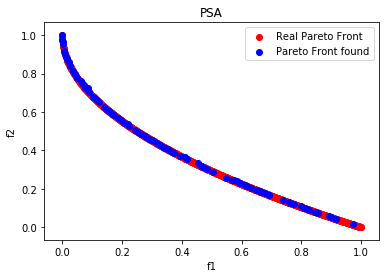

In [93]:
juphelpers.plotFrontgraphics(np.array([benchmarks.zdt1(ind) for ind in PSA_solutions_discret.bestPop]),
                             np.array(optimal_front),
                  title = "PSA",xlabel="f1",ylabel="f2")

In [94]:
# Saving information
if saveEnabled:
    juphelpers.GeneralCases.save_dict(dictionaireDiscretPSA, folderOfCSVs, CsvFileNameDiscret)

#### 5.6.4 Conclusion

It is a method whose choice of stochastic points is fundamental. The algorithm has been executed several times, obtaining varied but close results (same order of magnitude).

It is a model that primarily seeks convergence, while achieving optimal convergence and divergence. In order to obtain better and more consistent results, it is necessary to modify the parameters in values that can increase the execution time, but it should be noted that the algorithm acquires excellent results even with few populations and a small number of iterations.

#### 5.6.5 Bibliography

<a id='ParetoAntColonyToAnnealing'></a>
1. https://www.researchgate.net/publication/220462163_Pareto_Ant_Colony_Optimization_A_Metaheuristic_Approach_to_Multiobjective_Portfolio_Selection
<a id='PSAnnealing'></a>
2. https://pdfs.semanticscholar.org/3129/67df379edc8d315b407c97aa8f5da64617f9.pdf
<a id='PSAWiki'></a>
3. https://pt.wikipedia.org/wiki/Simulated_annealing

<a id='Tabu'></a>
### 5.7 Binary Multi-Objective Tabu Search

#### 5.7.1 Introduction

It is a method based on the prohibition (temporary or not) of the movements. The overall optimum can be found with a series of allowed movement sequences. Each move will be reached on a Taboo table to see if this is allowed or not.[[1]](#RandomParetoTabu)

#### 5.7.2 Methodology
Image taken from [[1]](#RandomParetoTabu):
![TabuPseudo](images/TabuPseudo.png)

#### 5.7.3 Implementation

In [95]:
# Dictionaries to save statistics
dictionaireDiscretBTabuSearch = {'Methods':'BinaryTabuSearch', 'Data':'ZDT1', 'Number of runs':number_of_runs,
                      'Real points':L_good,
                     'Fake points':(L_bad)}

In [96]:
# Creating a solution handler
bTabu_solutions_discret = juphelpers.bData.single_solution(methodName="Binary Tabu Search",
                                                   function_name=name_of_function,
                                                   good_points=L_good, bad_points=L_bad,
                                                   number_of_runs=number_of_runs,
                                                   numberOfPersons=number_of_instances,
                                                   iters=max_numer_of_iterations,
                                                   refpointToHyperV=[11,11],
                                                   identif="Binary-Tabu-Search-Discret-ZDT1",
                                                   pareto_front=optimal_front,
                                                   obj=benchmarks.zdt1,
                                                   lb=0, ub=1,
                                                   dim=dim_of_labels)

In [97]:
for run in range(number_of_runs):
    
    # Get a better population and statistics
    start_time = time.time()
    # ==================================================================================================
    pop = juphelpers.bTabuSearch.binary_pareto_tabu_search(benchmarks.zdt1,(-1,-1),X)
    # ==================================================================================================
    delta_time = time.time() - start_time
    
    # Add solution
    bTabu_solutions_discret.add_one_run(pop,delta_time)

In [98]:
# Convergence and diversity
(t,c,d,h) = bTabu_solutions_discret.returnMeanValues()

dictionaireDiscretBTabuSearch.update({'Average time of execution (s)':str(t)})
dictionaireDiscretBTabuSearch.update({'Average convergence':str(c), 'Average diversity':str(d),
                          'Average hypervolume':str(h)})

In [99]:
print("Time of execution: ",t)
print("Convergence: ",c)
print("Diversity: ",d)
print("hypervolume: ",h)

Time of execution:  0.101495893796285
Convergence:  0.0010370385041511899
Diversity:  0.34028771010221187
hypervolume:  120.6592828441508


In [100]:
# Add a solution to the list of solutions
list_of_solutions_discret.append(bTabu_solutions_discret)

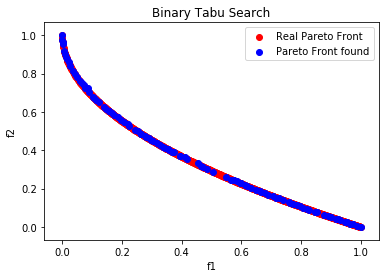

In [101]:
juphelpers.plotFrontgraphics(np.array([benchmarks.zdt1(ind) for ind in bTabu_solutions_discret.bestPop]),
                             np.array(optimal_front),
                  title = "Binary Tabu Search",xlabel="f1",ylabel="f2")

In [102]:
# Saving information
if saveEnabled:
    juphelpers.GeneralCases.save_dict(dictionaireDiscretBTabuSearch, folderOfCSVs, CsvFileNameDiscret)

#### 5.7.4 Conclusion

As we can see, Binary Tabu Search provides good results, as the choice of the Binary Tabu Search stage criterion compares the new point that will come with those already present in the non-dominated set, as well as Simple Cull. The complexity of the two algorithms therefore depends on the number of entry points and the size of the output.

#### 5.7.5 Bibliography

<a id='RandomParetoTabu'></a>
1. https://www.researchgate.net/publication/221477675_Randomized_Algorithm_with_Tabu_Search_for_Multi-Objective_Optimization_of_Large_Containership_Stowage_Plans

<a id='FullNSR'></a>
### 5.8. Full Non-dominated Sorting and Ranking

#### 5.8.1 Introduction
This algorithm has been applied in NSGAII and NSGAIII, but we apply it here in the dataset and not just with a small population. Some changes have been made to the code, but the goal is the same: to rank different non-dominated fronts.

To improve the result, it is possible to make a withdrawal using the crowding distance to intelligently remove the points of the Pareto front to have fewer points, but which express the front very well ( The procedure can be found in [[2]](#mogsacrowdingdistance)).

#### 5.8.2 Méthodologie

Image taken from [[1]](#fullnsrpseudo):
![nondominatedpseudo](images/nondominatedpseudo.png)

#### 5.8.3 Implementation

In [103]:
# Dictionaries to save statistics
dictionaireDiscretFnsr = {'Methods':'FullNonDominatedSortingAndRanking', 'Data':'ZDT1',
                                 'Number of runs':number_of_runs,
                      'Real points':L_good,
                     'Fake points':(L_bad)}

In [104]:
# Creating a solution handler
fnsr_solutions_discret = juphelpers.bData.single_solution(methodName="Full Non-Dominated Sorting and Ranking",
                                                   function_name=name_of_function,
                                                   good_points=L_good, bad_points=L_bad,
                                                   number_of_runs=number_of_runs,
                                                   numberOfPersons=number_of_instances,
                                                   iters=max_numer_of_iterations,
                                                   refpointToHyperV=[11,11],
                                                   identif="FullNonDominatedSortingAndRanking-Discret-ZDT1",
                                                   pareto_front=optimal_front,
                                                   obj=benchmarks.zdt1,
                                                   lb=0, ub=1,
                                                   dim=dim_of_labels)

In [105]:
for run in range(number_of_runs):
    
    # Get a better population and statistics
    start_time = time.time()
    # ==================================================================================================
    dict_pop = juphelpers.fullnsr.fnon_dominated_sorting_and_ranking(X,benchmarks.zdt1,(-1,-1))
    # ==================================================================================================
    delta_time = time.time() - start_time
    pop = [X[p] for p in dict_pop[1]]
    
    # Add solution
    fnsr_solutions_discret.add_one_run(juphelpers.fullnsr.smart_removal(pop,100-run,benchmarks.zdt1,(-1,-1)),delta_time)

In [106]:
# Convergence and diversity
(t,c,d,h) = fnsr_solutions_discret.returnMeanValues()

dictionaireDiscretFnsr.update({'Average time of execution (s)':str(t)})
dictionaireDiscretFnsr.update({'Average convergence':str(c), 'Average diversity':str(d),
                          'Average hypervolume':str(h)})

In [107]:
print("Time of execution: ",t)
print("Convergence: ",c)
print("Diversity: ",d)
print("hypervolume: ",h)

Time of execution:  0.379092812538147
Convergence:  0.0010063314377735612
Diversity:  0.2950789059634809
hypervolume:  120.65875198366582


In [108]:
# Add a solution to the list of solutions
list_of_solutions_discret.append(fnsr_solutions_discret)

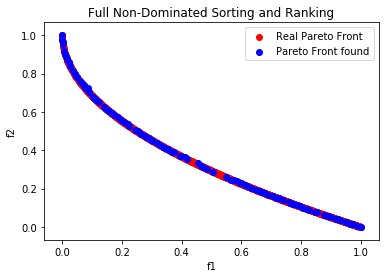

In [109]:
juphelpers.plotFrontgraphics(np.array([benchmarks.zdt1(ind) for ind in fnsr_solutions_discret.bestPop]),
                             np.array(optimal_front),
                  title = "Full Non-Dominated Sorting and Ranking",xlabel="f1",ylabel="f2")

In [110]:
# Saving information
if saveEnabled:
    juphelpers.GeneralCases.save_dict(dictionaireDiscretFnsr, folderOfCSVs, CsvFileNameDiscret)

#### 5.8.4 Conclusion

First, we note that non-dominated sorting and ranking appear to be the Simple Cull algorithm, but with a longer run time. However, it is much better than Simple Cull because we will not disclose any information. In other words, all the points will be ranked and those of rank 1 are part of the best front which, in this case, is the Pareto front of the solution.

It should also be noted that the use of the crowding distance allows us to reduce the number of Pareto frontal points in an intelligent way. Even if the number of points is less than the initial number of points, we will have points that represent very well the Pareto front.

So, because of the great complexity of the algorithm, if we have few points, it may be more advantageous than other stochastic algorithms.

#### 5.8.5 Bibliography

<a id='fullnsrpseudo'></a>
1. https://www.researchgate.net/figure/Pseudocode-of-the-fast-non-dominated-sort-algorithm_fig1_288975720
<a id='mogsacrowdingdistance'></a>
2. https://www.researchgate.net/publication/303184329_A_Multi_objective_gravitational_search_algorithm_based_on_non-dominated_sorting

---
<a id='ComparaisonDesResultats'></a>
## 6. Comparison of results

### 6.1 Continuous case

In [111]:
juphelpers.GeneralCases.open_csv(folderOfCSVs+"/"+CsvFileNameContinu)

,Methods,Data,Number of runs,Average time of execution (s),Average convergence,Average diversity,Average hypervolume
0,NSGAII,ZDT1,30,5.207257,0.005454,0.259872,120.537904
1,NSGAIII,ZDT1,30,2.332335,0.005974,0.810207,120.510977
2,SPEA2,ZDT1,30,9.041295,0.078957,0.999399,113.625959
3,MOGSA,ZDT1,30,136.321477,0.000748,0.410093,120.621109


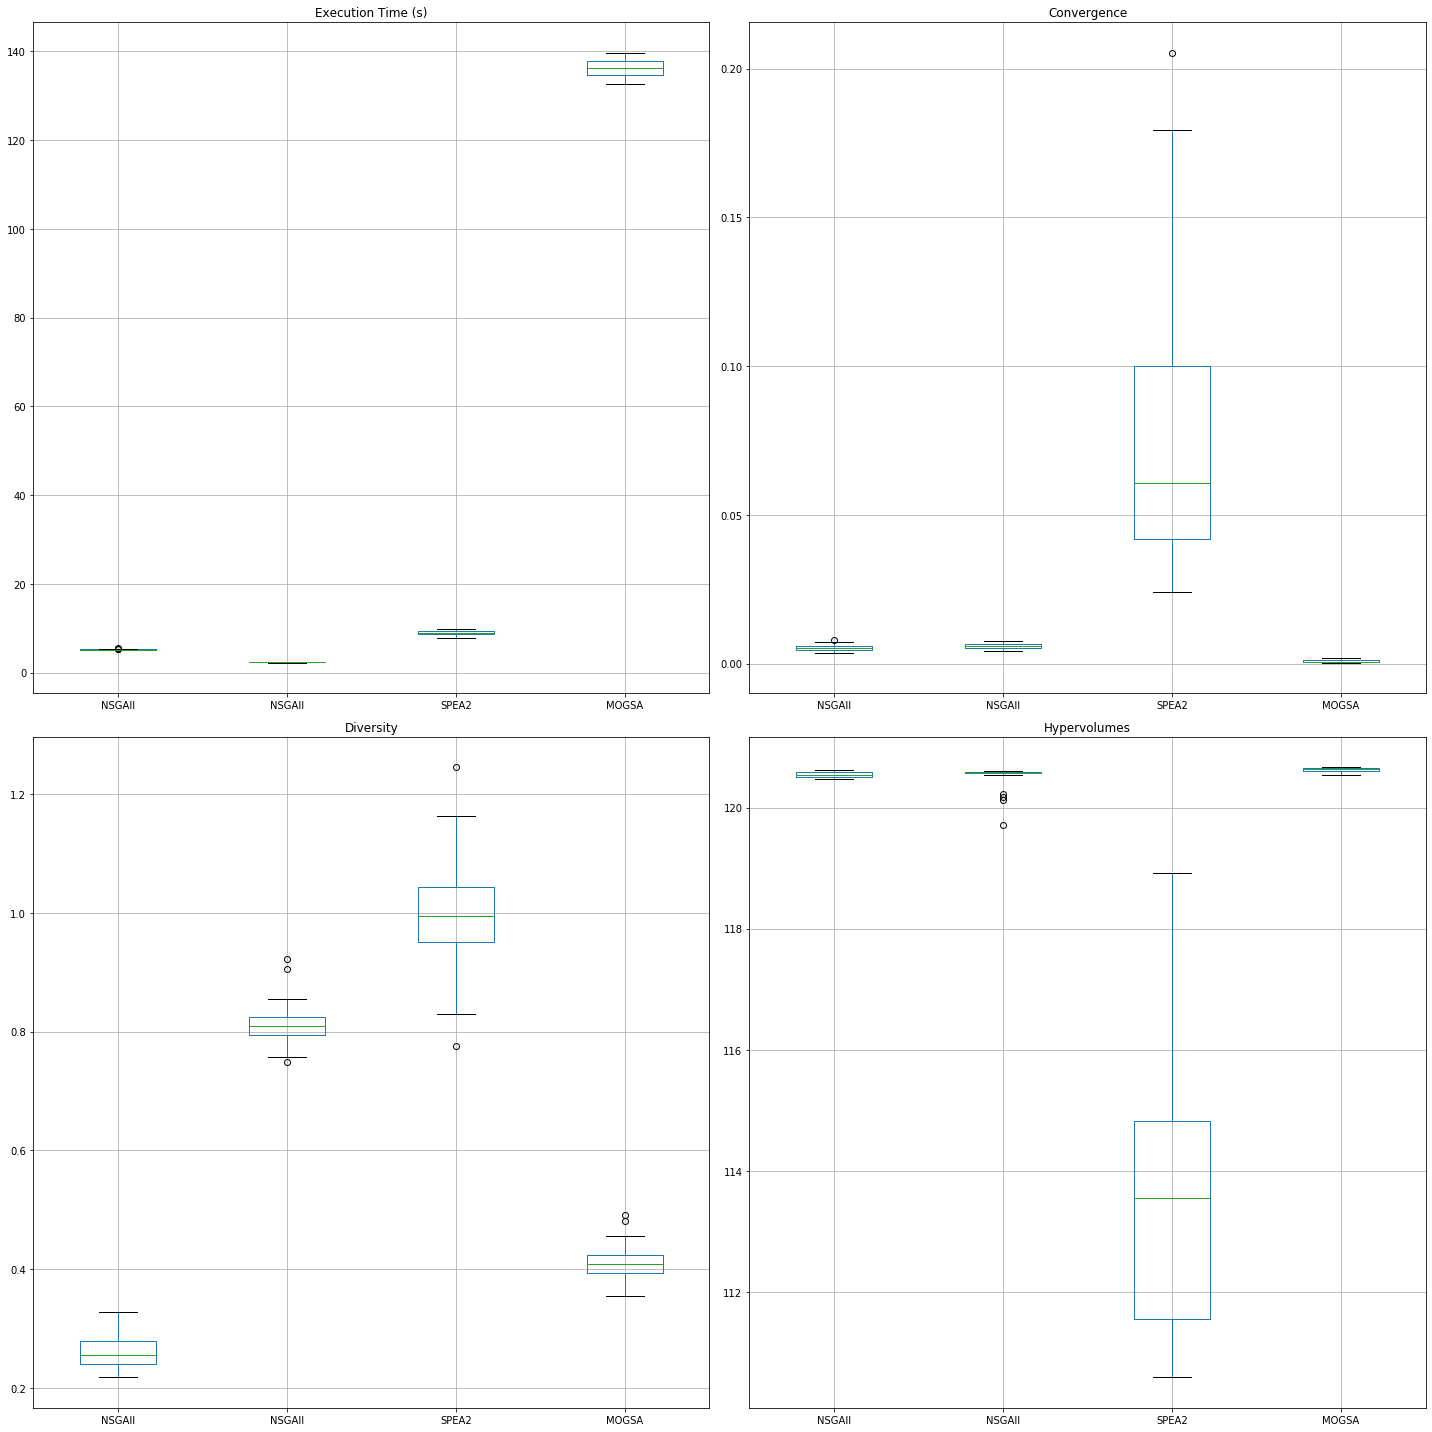

In [112]:
# Boxplot
juphelpers.bData.box_plot_solutions(list_of_solutions_continu)

### 6.2 Discrete case

In [113]:
juphelpers.GeneralCases.open_csv(folderOfCSVs+"/"+CsvFileNameDiscret)

,Methods,Data,Number of runs,Real points,Fake points,Average time of execution (s),Average convergence,Average diversity,Average hypervolume
0,NSGAII,ZDT1,30,100,100,1.909504,0.000742,0.314567,120.654461
1,NSGAIII,ZDT1,30,100,100,2.255117,0.000909,0.417943,120.600375
2,SPEA2,ZDT1,30,100,100,83.875629,0.001252,0.152315,120.652560
3,MOGSA,ZDT1,30,100,100,302.225065,0.001041,0.331467,120.659283
4,Simple Cull,ZDT1,30,100,100,0.039782,0.001041,0.331467,120.659283
5,PSA,ZDT1,30,100,100,5.451708,0.001041,0.387417,120.601689
6,BinaryTabuSearch,ZDT1,30,100,100,0.101496,0.001037,0.340288,120.659283
7,FullNonDominatedSortingAndRanking,ZDT1,30,100,100,0.379093,0.001006,0.295079,120.658752


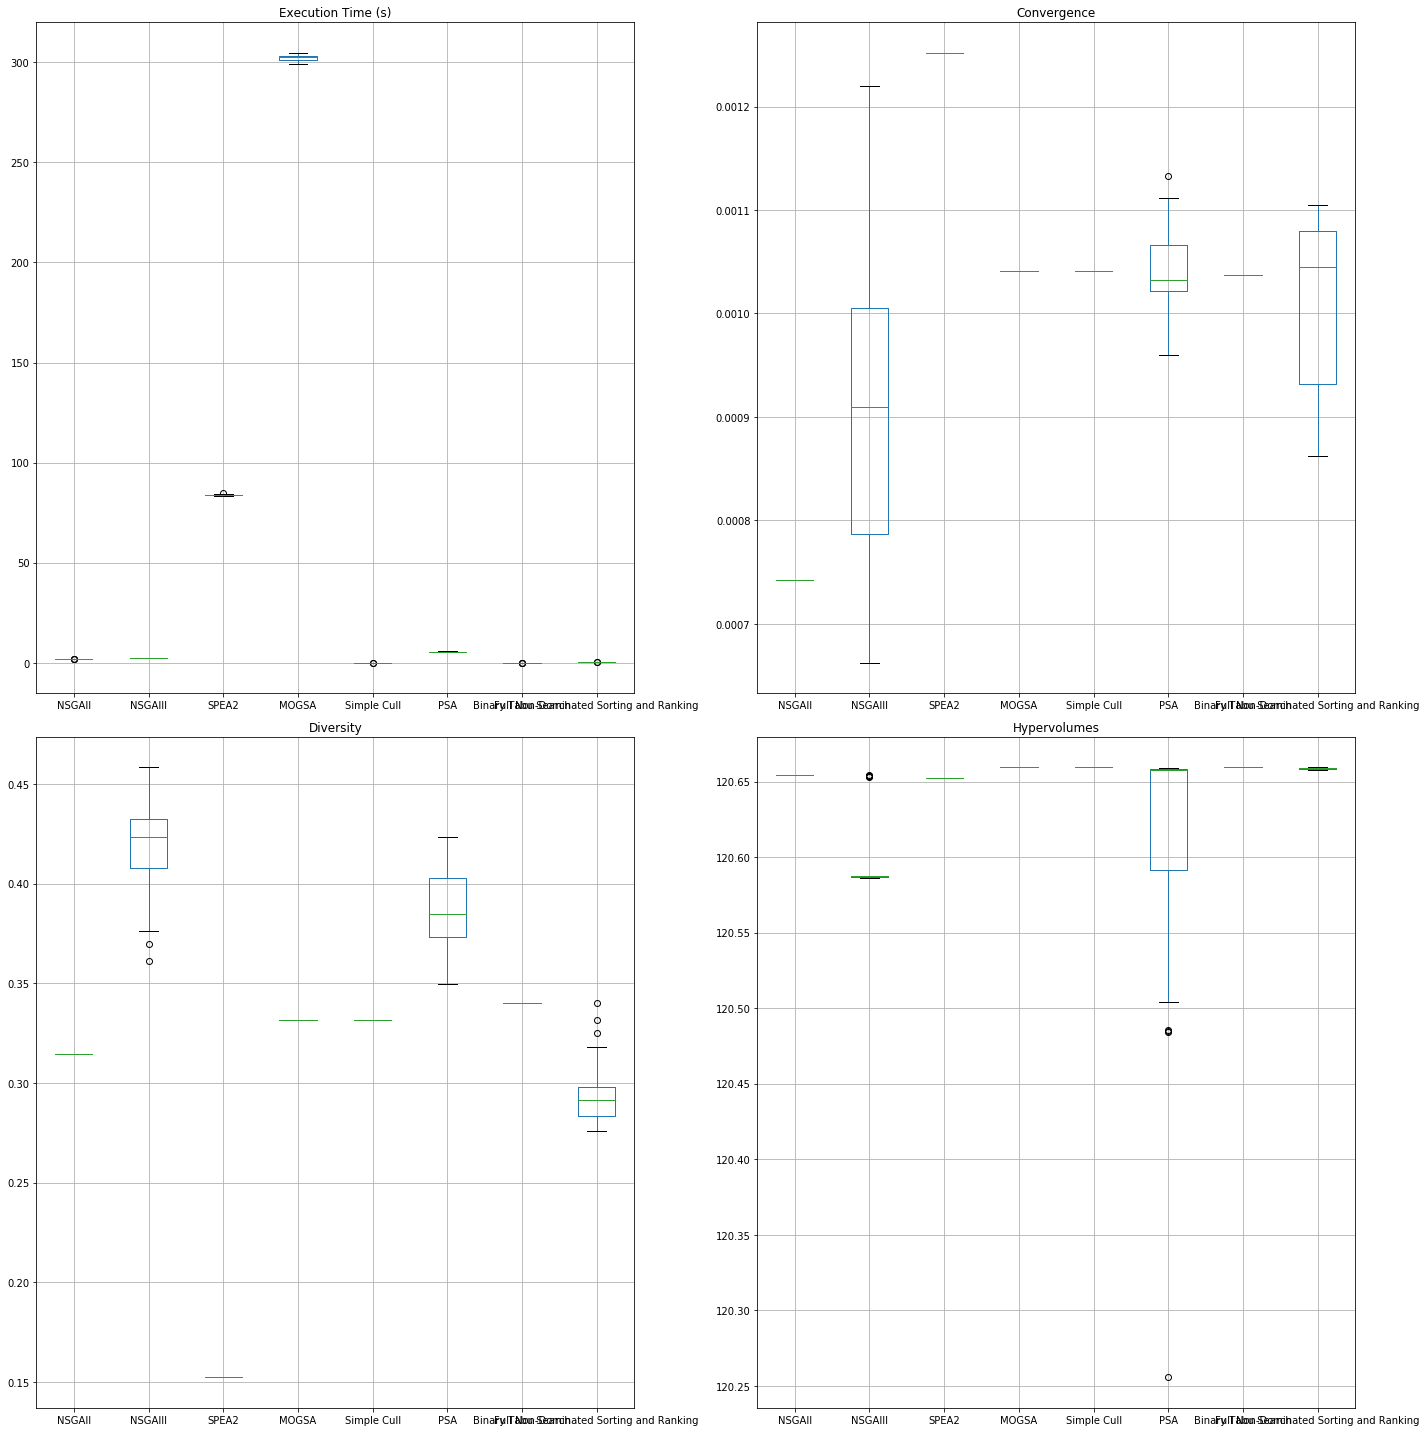

In [114]:
# Boxplot
juphelpers.bData.box_plot_solutions(list_of_solutions_discret)

---
<a id='Conclusion'></a>
## 7. Conclusion

Different multiobjective optimization algorithms have been tested and compared using different metaheuristics. Some algorithms have also been realized in both versions (continuous and discrete). Three measures were chosen to compare the algorithms **(hypervolume, convergence and divergence)**.

Binary genetic algorithms have achieved excellent results of hypervolume, convergence and divergence. Algorithms such as Simple Cull, Full Non-Dominated Sorting and Ranking and Binary Tabu Search have achieved excellent convergences, but they are algorithms that study the entire point space for each point, so they have **complexities of $ O (N ^ 2 \cdot dim) $**, so that they will have a long run time for large databases. It should also be noted that the PSA, even if it is the process that uses the least amount of information on all points, gives good results.

The MOGSA method has indeed resulted in optimal convergence results, as predicted by several articles. Even if the binary version gives good results, it is an algorithm whose **operators can still be exploited**. As stated previously, at the time of creating this code, there is not much information on a binary version version of the MOGSA method, therefore, the continuous version has been modified to a binary version and a mutation operator has been added.

Algorithms such as Full Non-Dominated Sorting and Ranking, MOGSA, NSGSAII and NSGSAIII have a great advantage: they provide secondary, tertiary and other Pareto fronts up to the last point of the database or population. Therefore, **NSGSAII and NSGAIII** being a consistent and widely used method offering great benefits (like speed), these algorithms would be an excellent choice for use in more robust projects (without giving up the utility of testing other algorithms and perform data engineering to select the best points of the NSGSAII and NSGAIII results to improve diversity).

So, if the problem has few points, it is advisable to use deterministic algorithms such as **Simple Cull** and **Non-Dominated Sorting and Ranking**, especially the latter, because it provides other secondary fronts, thirds, etc. However, if there is a lot of data, it is advisable to use **SPEA2** (adjust the parameters to optimize the speed) to have a good diversity or to use **NSGAII** (few functions to optimize ) and **NSGAIII** (in the case of several functions to optimize) to obtain, with high speed and almost constant, not only the Pareto front, but also other fronts as well as Non-Dominated Sorting and Ranking algorithm. Regardless of the method used, crowding distance can be used to intelligently reduce the number of points in the Pareto front and continue to have points that describe it well (so that diversity is improved).

---
<a id='AnnexeA'></a>
## 8. Appendix A - Other algorithms

<a id='ParetoAntColony'></a>
### 8.1 Pareto Ant Colony

#### 8.1.1 introduction

The idea is very simple. This is an algorithm based on an ant colony and their behavior. Ants leave traces of pheromone as they pass, bringing other ants into the same spot. A given ant would follow the path with more pheromones. In this algorithm, the paths that have the most important points receive more pheromone at each iteration.

#### 8.1.2 Methodology

Image taken from [[1]](#PACO):
![PseudocodePACO1](images/PACO1.png)
![PseudocodePACO2](images/PACO2.png)

#### 8.1.3 Discussion

First of all about P-ACO. It is a very open algorithm, that is to say it is necessary to have initial information on the problem and the data set to establish different rules, which can even lead to the search for good solutions, but not belonging to the Pareto curve according to the criterion of choice of the 2 best ants.

Always in relation with P-ACO, it is an algorithm that needs to be improved with other techniques (such as the dynamic heuristic information calculation approach[[2]](#ModifiedPACO)) to increase its robustness. **Each technique can exponentially increase the complexity of the algorithm which can vary considerably depending on the number of ants and points.**

Finally, there is an algorithm called m-ACO in which ants that can find a Pareto curve will be rewarded. This algorithm is in the same situation as P-ACO with respect to improvements and, with improvements, **the SPEA (version prior to SPEA2 which, in turn, gives results that can be exceeded by the NSGAII) a results close to or better than m-ACO**.[[3]](#m-ACO)

##### 8.1.4 Bibliography
<a id='PACO'></a>
1. https://link.springer.com/content/pdf/10.1023%2FB%3AANOR.0000039513.99038.c6.pdf
<a id='ModifiedPACO'></a>
2. https://www.hindawi.com/journals/ijae/2017/1746124/
<a id='m-ACO'></a>
3. https://www.researchgate.net/publication/4302134_Ant_Colony_Optimization_for_Multi-Objective_Optimization_Problems

---
<a id='MOPS'></a>
### 8.2 Multi-Objective Particle Swarm

#### 8.2.1 introduction

It is an algorithm that will try iteratively to improve the results of possible candidates (particles) with respect to different objectives while trying to establish a Pareto curve.

#### 8.2.2 Méthodologie
This algorithm is very close to [NSGSA](#NSGSA), where each particle will change its velocity and position relative to another particle. What is different is that the update (which only concerns the position and the speed) is updated with respect to a singular point (the "main particle") and the information of the particle being set. day (as the best position).

Image taken from [[1]](#HumanInteractionMultiObjectivePSO):
![MOPSO-PSEUDO](images/MOPSO-PSEUDO.png)
![MOPSO-PSEUDO2](images/MOPSO-PSEUDO2.png)

#### 8.2.3 Discussion

It should be noted that this is a less robust method than [NSGSA](#NSGSA), in which only the two-point information will be taken into account for the updates. In fact, according to the results illustrated in [[1]](#HumanInteractionMultiObjectivePSO), in one case, the algorithm favored one objective more than the other in the search for the Pareto curve, while in the other, it classified certain non-dominated points into dominated points.

##### 8.2.4 Bibliography
<a id='HumanInteractionMultiObjectivePSO'></a>
1. https://www.sciencedirect.com/science/article/pii/S0895717710000695#fd9

## General Bibliography
<a id='BGNSGAII'></a>
1. [Results avec NSGAII](https://www.researchgate.net/figure/Comparison-between-GA-NSGA-II-and-NSGA_fig1_235697487)
<a id='BGNSGSA'></a>
2. [Resultats avec NSGSA](http://icsi11.eisti.fr/papers/paper_12.pdf)
<a id='BGComp'></a>
3. [Comparaison entre différents algorithmes](https://www.google.com/url?sa=i&rct=j&q=&esrc=s&source=images&cd=&ved=2ahUKEwjY7aijlonjAhVr8-AKHVI4C_cQ5TV6BAgBEAs&url=http%3A%2F%2Fwww.itiis.org%2Fdigital-library%2Fmanuscript%2Ffile%2F1714%2FTIIS%2BVol%2B11%2C%2BNo%2B6-5.pdf&psig=AOvVaw3iiTXtf-9Qy0ZPYB8Zk8Cp&ust=1561708052099278)
<a id='metriquesconvergenceetdiversity'></a>
4. [Metrics: convergence and diversity](https://deap.readthedocs.io/en/master/api/benchmarks.html)
<a id='metriqueshypervolume'></a>
5. [Metrics: hypervolume](https://hal.inria.fr/inria-00638989/file/tcspaper.pdf)
<a id='paretofrontexpl'></a>
6. [Pareto front](https://en.wikipedia.org/wiki/Pareto_efficiency)